In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import shapely
import matplotlib.pyplot as plt
import datetime as dt
import pysal

/Users/iv/anaconda3/envs/GIS/lib/python3.6/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [2]:
import pysal.lib
points=[(10, 10), (20, 10), (40, 10), (15, 20), (30, 20), (30, 30)]
wcheck = pysal.lib.weights.W({0: [1, 3], 1: [0, 3], 2: [], 3: [0, 1], 4: [5], 5: [4]})

/Users/iv/anaconda3/envs/GIS/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: There is one disconnected observation (no neighbors).
Island id: 2
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
wcheck

In [8]:
p = np.array(points).T

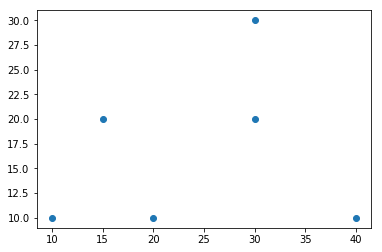

In [9]:
plt.scatter(p[0], p[1])

In [14]:
wcheck.full()

(array([[0., 1., 0., 1., 0., 0.],
        [1., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1., 0.]]), [0, 1, 2, 3, 4, 5])

In [23]:
db = pysal.lib.weights.distance.DistanceBand(points, threshold=15)

In [24]:
type(db)

pysal.lib.weights.distance.DistanceBand

In [25]:
db.weights

{0: [1.0, 1.0],
 1: [1.0, 1.0, 1.0],
 2: [1.0],
 3: [1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0, 1.0],
 5: [1.0]}

In [29]:
w = pysal.lib.weights.distance.DistanceBand(points,threshold=11.2)

/Users/iv/anaconda3/envs/GIS/lib/python3.6/site-packages/pysal/lib/weights/util.py:805: UserWarning: There is one disconnected observation (no neighbors).
Island id: 2
  silence_warnings=silence_warnings)
/Users/iv/anaconda3/envs/GIS/lib/python3.6/site-packages/pysal/lib/weights/distance.py:791: UserWarning: There is one disconnected observation (no neighbors).
Island id: 2
  W.__init__(self, neighbors, weights, ids, silence_warnings=self.silence_warnings)


In [32]:
w.neighbors

{0: array([1, 3], dtype=int32),
 1: array([0, 3], dtype=int32),
 2: array([], dtype=int32),
 3: array([0, 1], dtype=int32),
 4: array([5], dtype=int32),
 5: array([4], dtype=int32)}

In [38]:
kd = pysal.lib.cg.kdtree.KDTree(p.T)

In [42]:
wnn = pysal.lib.weights.KNN(kd, 3)

In [45]:
wnn[2]

{4: 1.0, 1: 1.0, 5: 1.0}